In [74]:
import os
from os import listdir, makedirs
from os.path import isfile, join
from pandas import *
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
key_words = ["sun", "util", "react", "lambda", "service", "validate"]
alphabet = "abcdefghijklmnopqrstuvwxyz"
text_length = [100,300,500,700,900,1100,1300,1500,1700]

letter_frequencies = {'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253, 'e': 0.12702, 'f': 0.0228,
            'g': 0.02015, 'h': 0.06094, 'i': 0.06966, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025,
            'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929, 'q': 0.00095, 'r': 0.05987,
            's': 0.06327, 't': 0.09056, 'u': 0.02758, 'v': 0.00978, 'w': 0.0236, 'x': 0.0015, 
            'y': 0.01974, 'z': 0.00074}

# Encoding part

In [3]:
def create_matrix(n, m, key_word) :
    
    matrix = [['' for x in range(m)] for x in range(n)]

    for i in range(1, n):
        matrix[i][0] = key_word[i - 1]
    
    for j in range(0, m):
        matrix[0][j] = alphabet[j]    
    
    for i in range(1, n):
        start_char = matrix[i][0]
        start_char_num = alphabet.index(start_char)
    
        for j in range(1, m - start_char_num):
            matrix[i][j] = alphabet[start_char_num + j]
        l = 0
        for j in range(m - start_char_num, m):
            matrix[i][j] = alphabet[l]
            l += 1
            
    return matrix

In [4]:
print(create_matrix(len(key_words[0])+1, len(alphabet),key_words[0]))

[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], ['s', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'], ['u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't'], ['n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']]


In [5]:
def create_key_word_line(seq, key_word):
    line = ""
    
    l = len(seq)
    
    k = 0
    m = len(key_word)
    for i in range(l):
        line+=key_word[k]
        k+=1
        if (k == m):
            k = 0
    
    return line

In [6]:
create_key_word_line("asldkjas aslkdjaslkdjas laskdjsaldkjsaldjk aslkdjsalkdjsaldkj alskdjaslkdjsal alskdjsalkdjsa", "sun")

'sunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsu'

In [7]:
def encode_line(line, key_word_line, matrix, key_word):
    
    n = len(key_word)+1
    m = len(matrix[0])
    l = len(line)
    
    encoded_line = ""
    
    for i in range(l):
        seq_char = line[i]
        help_char = key_word_line[i]
       
        if (seq_char.isalpha()): 
#             print(seq_char + ' ' +str(i))
            char_ind = alphabet.index(seq_char)
            help_ind = key_word.index(help_char) + 1       
            encoded_line += matrix[help_ind][char_ind]
        else:
            encoded_line += seq_char
        
    return encoded_line

In [8]:
text = "hello world, im svyatoslav kulich. back to my world - im java programmer"
key_word = "sun"
key_word_line = create_key_word_line(text, key_word)
# print(key_word_line)
matrix = create_matrix(len(key_word)+1, len(alphabet), key_word)
for x in matrix:
    print(*x, sep=" ")
print()
print(text)
print(encode_line(text, key_word_line, matrix, key_word))
print(key_word_line)

a b c d e f g h i j k l m n o p q r s t u v w x y z
s t u v w x y z a b c d e f g h i j k l m n o p q r
u v w x y z a b c d e f g h i j k l m n o p q r s t
n o p q r s t u v w x y z a b c d e f g h i j k l m

hello world, im svyatoslav kulich. back to my world - im java programmer
zyydi oiedx, cz miquggmysp coyawu. oswx nb gl qbjfq - ag buis cjitjuzeye
sunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsun


In [9]:
m = len(alphabet)


for length in text_length:
    for i in range(1,11):
        for key_word in key_words:
            
            n = len(key_word)+1
            output_path = "L:\\КБ\\lab1\\encoded_text\\"+str(length)+"\\"+key_word+"\\lowercase_text ("+str(i)+").txt"
            input_path = "L:\\КБ\\lab1\\plain_text\\lowercase_text ("+str(i)+").txt"
            
            text_input_wrapper = open(input_path, 'r')
            curr_text = str(text_input_wrapper.read())[:length]
            matrix = create_matrix(n, m, key_word)
            help_line = create_key_word_line(curr_text, key_word)
#             print(input_path)
            encoded_line = encode_line(curr_text, help_line, matrix, key_word)
            if not os.path.exists(os.path.dirname(output_path)):
                makedirs(os.path.dirname(output_path))
            text_output_wrapper = open(output_path, 'w')
            text_output_wrapper.write(encoded_line)
    
            text_input_wrapper.close()
            text_output_wrapper.close()

print("Encoding finished!")

Encoding finished!


# Decoding part 

In [10]:
def find_deltas(text, l_gramm_length):
    
    dictionary = {}
    entries = {}
    deltas = {}
    global_deltas = []
    
    for i in range ((len(text) - l_gramm_length + 1)):
        curr_l_gramm = text[i:i+l_gramm_length]
        if (dictionary.get(curr_l_gramm) == None):
            
            dictionary[curr_l_gramm] = 1
            entries[curr_l_gramm] = [i]
            deltas[curr_l_gramm] = []
            
        else:
            dictionary[curr_l_gramm] += 1
#             print(entries[curr_substring])
            deltas[curr_l_gramm].append(i - entries[curr_l_gramm][-1])
            global_deltas.append(i - entries[curr_l_gramm][-1])
            entries[curr_l_gramm].append(i)
            
#     print(global_deltas)
    return deltas

In [11]:
d = find_deltas("abcfhabcasdsadsagjhrpomvldjvbjhbskajskjsaqgabc", 3)
print(d)

{'abc': [5, 38], 'bcf': [], 'cfh': [], 'fha': [], 'hab': [], 'bca': [], 'cas': [], 'asd': [], 'sds': [], 'dsa': [3], 'sad': [], 'ads': [], 'sag': [], 'agj': [], 'gjh': [], 'jhr': [], 'hrp': [], 'rpo': [], 'pom': [], 'omv': [], 'mvl': [], 'vld': [], 'ldj': [], 'djv': [], 'jvb': [], 'vbj': [], 'bjh': [], 'jhb': [], 'hbs': [], 'bsk': [], 'ska': [], 'kaj': [], 'ajs': [], 'jsk': [], 'skj': [], 'kjs': [], 'jsa': [], 'saq': [], 'aqg': [], 'qga': [], 'gab': []}


In [12]:
def array_gcd(array):
#     print(array)
    val = array[0]
    for i in range(len(array)):
        val = math.gcd(val, array[i])
    
    return val

In [13]:
def find_key_word_length(l_gramm_deltas):
    all_values = []
    for key in l_gramm_deltas:
        for i in range(len(l_gramm_deltas[key])):
            all_values.append(l_gramm_deltas[key][i])
    if all_values:
#         print(all_values)
        return array_gcd(all_values)
    else:
        return -1

In [21]:
def find_letter (encoded_subline, keyword_length):
    
    frequency = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0,
            'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0,
            'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0,
            's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 
            'y': 0, 'z': 0}
    
    amount = 0

    for i in range(0, len(encoded_subline)):
        if (encoded_subline[i].isalpha()):
            amount += 1
            frequency[encoded_subline[i]] += 1
        
    for key, value in frequency.items():
        if (value != 0):
            frequency[key] = value / amount
        else:
            frequency[key] = 0
            
    frequencies_list_shifted = list(frequency.values())
    
    real = np.array(list(letter_frequencies.values()))
    my = np.array(frequencies_list_shifted)

    all_normas = []
    all_normas.append(np.linalg.norm(real - my))

    for i in range (1, len(alphabet)):
#         print(i)
        frequencies_list_shifted = frequencies_list_shifted[1:] + frequencies_list_shifted[:1]
#         print(frequencies_list_shifted)
        my = np.array(frequencies_list_shifted)
        all_normas.append(np.linalg.norm(real - my))

    offset = all_normas.index(min(all_normas))

    return alphabet[offset]

In [15]:
def decode_line(encoded_line, key_word_line, matrix, key_word):
    
    n = len(key_word)+1
    m = len(matrix[0])
    l = len(encoded_line)
    
    decoded_line = ""
    
    for i in range(l):
        seq_char = encoded_line[i]
        help_char = key_word_line[i]
       
        if (seq_char.isalpha()): 
#             print(seq_char + ' ' +str(i))
            help_ind = key_word.index(help_char) + 1   
            char_ind = matrix[help_ind].index(seq_char)
            decoded_line += alphabet[char_ind]
        else:
            decoded_line += seq_char
        
    return decoded_line

In [80]:
m = len(alphabet)
text_length = [100,300,500,700,900,1100,1300,1500,1700]
for l_gramma_length in range(3,8):
    for length in text_length:    
        for key_wd in key_words:
            for i in range(1,11):
                input_path = "L:\\КБ\\lab1\\encoded_text\\"+str(length)+"\\"+key_wd+"\\lowercase_text ("+str(i)+").txt"
                output_path = "L:\\КБ\\lab1\\decoded_text\\"+str(l_gramma_length)+"\\"+str(length)+"\\"+key_wd+"\\lowercase_text ("+str(i)+").txt"
    #             print(input_path)
    #             print(output_path)
    
                if not os.path.exists(os.path.dirname(output_path)):
                        makedirs(os.path.dirname(output_path))
    
                text_input_wrapper = open(input_path, 'r')
                text_output_wrapper = open(output_path, 'w')
            
                curr_text = str(text_input_wrapper.read())

                deltas = find_deltas(curr_text, l_gramma_length)

                key_word_length = find_key_word_length(deltas)
    #             print(key_word_length)
                #     encoded_subline = encoded_line[j::keyword_length]
                key_word = ''
                decoded_line = ''
                if (key_word_length>1):
                    for i in range(key_word_length):
                        key_word += find_letter(curr_text[i::key_word_length], key_word_length)

    #                 print("key_word: " + key_word + "; length: "+str(key_word_length))
                    n = len(key_word)+1
                    matrix = create_matrix(n, m, key_word)
                    help_line = create_key_word_line(curr_text, key_word)
                    decoded_line = decode_line(curr_text, help_line, matrix, key_word)
                else:
                    print("can't decode file from input path: "+input_path)
                    
                text_output_wrapper.write(decoded_line)

                text_input_wrapper.close()
                text_output_wrapper.close()

can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\java\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\java\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\java\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\java\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\java\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\class\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\class\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\class\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\lambda\lowercase_text (2)

can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\class\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\lambda\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\lambda\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\900\lambda\lowerca

can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\java\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\class\lowercase

can't decode file from input path: L:\КБ\lab1\encoded_text\1700\lambda\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\lambda\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\lambda\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\lambda\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\service\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded

can't decode file from input path: L:\КБ\lab1\encoded_text\500\service\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\service\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\service\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\service\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\service\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\validate\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\700\sun\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\700\java\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\700\java\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\700\java\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\700\java\lowe

can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1300\service\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\enc

can't decode file from input path: L:\КБ\lab1\encoded_text\1700\validate\lowercase_text (6).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\validate\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\validate\lowercase_text (8).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\validate\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1700\validate\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\100\sun\lo

can't decode file from input path: L:\КБ\lab1\encoded_text\1500\sun\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\class\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\class\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\lambda\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\lambda\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\service\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\service\lowercase_text (9).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\service\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\validate\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\1500\validate\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_tex

can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\validate\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\validate\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\validate\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\java\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500\java\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\500

can't decode file from input path: L:\КБ\lab1\encoded_text\300\lambda\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (1).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (4).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (5).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (7).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\service\lowercase_text (10).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\validate\lowercase_text (2).txt
can't decode file from input path: L:\КБ\lab1\encoded_text\300\validate\lowercase_text (3).txt
can't decode file from input path: L:\КБ\lab1\encoded_tex

In [76]:
input_path = "L:\КБ\lab1\plain_text\\lowercase_text (5).txt"
# output_path = "L:\\КБ\\lab1\\decoded_text\\1700\\sun\\lowercase_text (3).txt"
# #             print(input_path)
# #             print(output_path)
text_input_wrapper = open(input_path, 'r')
text = str(text_input_wrapper.read())

key_word = key_words[5]
key_word_line = create_key_word_line(text, key_word)
# print(key_word_line)
matrix = create_matrix(len(key_word)+1, len(alphabet), key_word)

curr_text = encode_line(text, key_word_line, matrix, key_word)

for x in matrix:
    print(*x, sep=" ")
    
print()
print(text[0:20])
print(curr_text[0:20])
print(key_word_line[0:20])    


deltas = find_deltas(curr_text, 9)
# print(deltas)
key_word_length = find_key_word_length(deltas)
# print(key_word_length)
            #     encoded_subline = encoded_line[j::keyword_length]
key_word = ''
if (key_word_length>1):
    for i in range(key_word_length):
        key_word += find_letter(curr_text[i::key_word_length], key_word_length)
#         print(curr_text[i::key_word_length])
                
    print("key_word: " + key_word + "; length: "+str(key_word_length))
    n = len(key_word)+1
    matrix = create_matrix(n, m, key_word)
    help_line = create_key_word_line(curr_text, key_word)
    decoded_line = decode_line(curr_text, help_line, matrix, key_word)
#     if not os.path.exists(os.path.dirname(output_path)):
#         makedirs(os.path.dirname(output_path))
#     text_output_wrapper = open(output_path, 'w')
#     text_output_wrapper.write(decoded_line)
    
#     text_input_wrapper.close()
#     text_output_wrapper.close()

    if (text == decoded_line):
        print("Successfull!")
                
else:
    print("can't decode file from input path: "+input_path)

a b c d e f g h i j k l m n o p q r s t u v w x y z
v w x y z a b c d e f g h i j k l m n o p q r s t u
a b c d e f g h i j k l m n o p q r s t u v w x y z
l m n o p q r s t u v w x y z a b c d e f g h i j k
i j k l m n o p q r s t u v w x y z a b c d e f g h
d e f g h i j k l m n o p q r s t u v w x y z a b c
a b c d e f g h i j k l m n o p q r s t u v w x y z
t u v w x y z a b c d e f g h i j k l m n o p q r s
e f g h i j k l m n o p q r s t u v w x y z a b c d

far far away, behind
aac iak vwlg, uiciyl
validatevalidatevali
key_word: validate; length: 8
Successfull!


In [112]:
def count_chances():
    x_key_word = []
    for k_word in key_words:
        x_key_word.append(len(k_word))
        
    x_text_length = text_length
    
    length = 1700    
    key_wd = key_words[4] # "service"
    
    y_key_word = {}
    y_text_length = {} 

    for l_gramma_length in range(3,8):
        y_text_length[l_gramma_length] = dict.fromkeys(text_length)
        for lnth in text_length: 
            success = 0.0
            for i in range(1,11):
                input_path = "L:\\КБ\\lab1\\plain_text\\lowercase_text ("+str(i)+").txt"
                decoded_path = "L:\\КБ\\lab1\\decoded_text\\"+str(l_gramma_length)+"\\"+str(lnth)+"\\"+key_wd+"\\lowercase_text ("+str(i)+").txt"

                text_input_wrapper = open(input_path, 'r')
                plain_text = str(text_input_wrapper.read())

                decoded_text_input_wrapper = open(decoded_path, 'r')
                decoded_text = str(decoded_text_input_wrapper.read())

                plain_text = plain_text[:lnth]
                
                if (plain_text == decoded_text):
                    success += 1
                    
            result = success / 10
#             print(str(result)+ " "+decoded_path)
#             print(l_gramma_length)
#             print(lnth)
#             print(y_text_length[l_gramma_length][lnth])

            y_text_length[l_gramma_length][lnth] = result
#             print(y_text_length[l_gramma_length])
#             print(y_text_length[l_gramma_length][lnth])

    
    for l_gramma_length in range(3,8):
        y_key_word[l_gramma_length] = dict.fromkeys(x_key_word)
        for k_word in key_words: 
            success = 0.0
            for i in range(1,11):
                input_path = "L:\\КБ\\lab1\\plain_text\\lowercase_text ("+str(i)+").txt"
                decoded_path = "L:\\КБ\\lab1\\decoded_text\\"+str(l_gramma_length)+"\\"+str(length)+"\\"+k_word+"\\lowercase_text ("+str(i)+").txt"


                text_input_wrapper = open(input_path, 'r')
                plain_text = str(text_input_wrapper.read())

                decoded_text_input_wrapper = open(decoded_path, 'r')
                decoded_text = str(decoded_text_input_wrapper.read())

                plain_text = plain_text[:lnth]
                
                if (plain_text == decoded_text):
                    success += 1
        
            result = success / 10
            
            y_key_word[l_gramma_length][len(k_word)] = result
        
    return y_text_length, y_key_word

In [113]:
text_length_coord, key_word_coord = count_chances()

In [114]:
print(text_length_coord)
print(key_word_coord)

{3: {100: 0.0, 300: 0.0, 500: 0.0, 700: 0.0, 900: 0.0, 1100: 0.0, 1300: 0.0, 1500: 0.0, 1700: 0.0}, 4: {100: 0.0, 300: 0.2, 500: 0.5, 700: 0.3, 900: 0.3, 1100: 0.0, 1300: 0.0, 1500: 0.0, 1700: 0.0}, 5: {100: 0.0, 300: 0.1, 500: 0.6, 700: 0.9, 900: 0.9, 1100: 0.7, 1300: 0.6, 1500: 0.6, 1700: 0.7}, 6: {100: 0.0, 300: 0.1, 500: 0.2, 700: 0.6, 900: 0.7, 1100: 0.8, 1300: 0.9, 1500: 0.9, 1700: 1.0}, 7: {100: 0.0, 300: 0.1, 500: 0.2, 700: 0.5, 900: 0.5, 1100: 0.7, 1300: 0.9, 1500: 0.9, 1700: 1.0}}
{3: {3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 4: {3: 0.1, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 5: {3: 0.9, 4: 0.6, 5: 0.8, 6: 0.6, 7: 0.7, 8: 0.7}, 6: {3: 1.0, 4: 1.0, 5: 0.9, 6: 1.0, 7: 1.0, 8: 1.0}, 7: {3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0}}


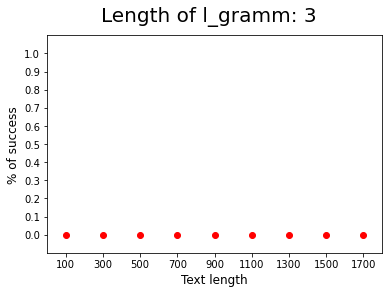

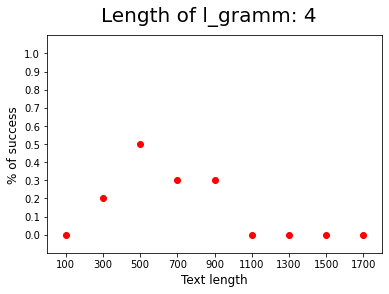

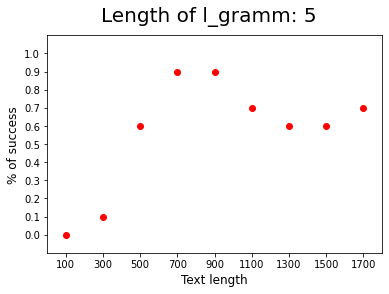

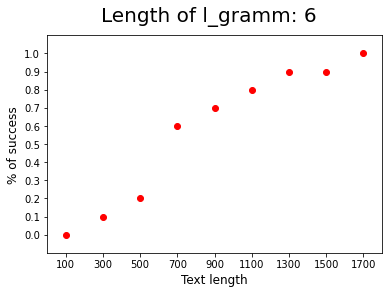

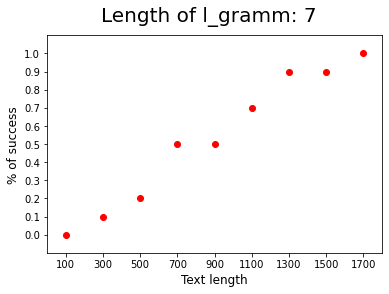

In [125]:
for l_gramm_length in text_length_coord:
    x = []
    y = []
    for x_text_length in text_length_coord[l_gramm_length]:
        x.append(x_text_length)
        y.append(text_length_coord[l_gramm_length][x_text_length])
        
    plt.suptitle('Length of l_gramm: '+str(l_gramm_length), fontsize=20)
    plt.plot(x, y, 'ro')
    plt.xlabel('Text length', fontsize=12)
    plt.ylabel('% of success', fontsize=12)
    plt.xticks(np.arange(min(text_length), max(text_length)+200, 200))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    plt.axis([0, text_length[8]+100, -0.1, 1.1])
    plt.show()

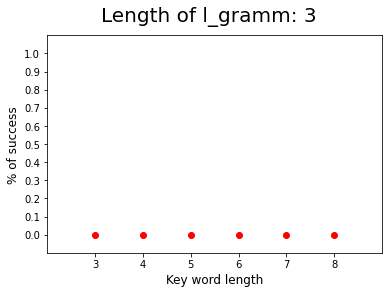

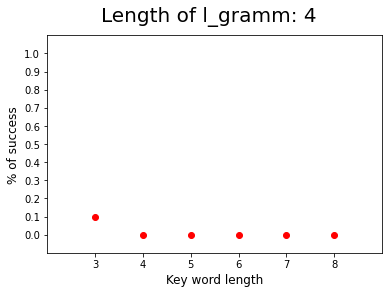

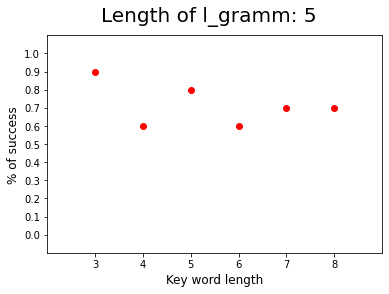

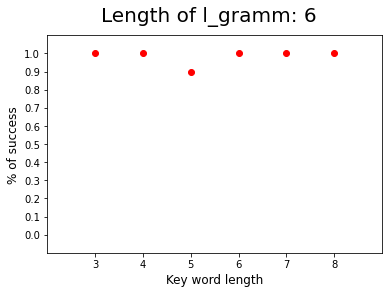

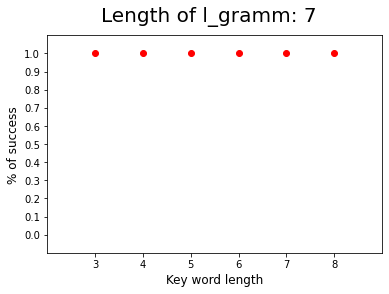

In [131]:
for l_gramm_length in key_word_coord:
    x = []
    y = []
    for x_key_word in key_word_coord[l_gramm_length]:
        x.append(x_key_word)
        y.append(key_word_coord[l_gramm_length][x_key_word])
        
    plt.suptitle('Length of l_gramm: '+str(l_gramm_length), fontsize=20)
    plt.plot(x, y, 'ro')
    plt.xlabel('Key word length', fontsize=12)
    plt.ylabel('% of success', fontsize=12)
    plt.xticks(np.arange(len(key_words[0]), len(key_words[len(key_words)-1])+1, 1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    plt.axis([len(key_words[0])-1, len(key_words[len(key_words)-1])+1, -0.1, 1.1])
    plt.show()